# Importing Basic Dependencies

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.shape

(20800, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [10]:
df.drop(columns = ['id','title','author'],inplace=True)

In [11]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [13]:
df.isnull().sum()

text     39
label     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB


In [15]:
#drop null values

df.dropna(inplace=True)

In [16]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [17]:
df.shape

(20761, 2)

In [18]:
df.duplicated().sum()

375

In [19]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [20]:
df.shape

(20386, 2)

# EDA

In [21]:
df['label'].value_counts()

0    10387
1     9999
Name: label, dtype: int64

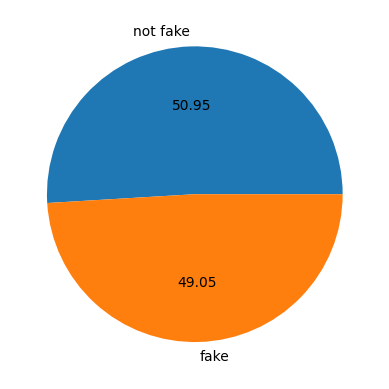

In [22]:
plt.pie(df['label'].value_counts(), labels=['not fake','fake'],autopct="%0.2f")
plt.show()

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,text,label,num_characters
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,Ever get the feeling your life circles the rou...,0,4160
2,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,Print \nAn Iranian woman has been sentenced to...,1,938


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,text,label,num_characters,num_words
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,943
1,Ever get the feeling your life circles the rou...,0,4160,822
2,"Why the Truth Might Get You Fired October 29, ...",1,7692,1454
3,Videos 15 Civilians Killed In Single US Airstr...,1,3237,612
4,Print \nAn Iranian woman has been sentenced to...,1,938,177


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,text,label,num_characters,num_words,num_sentences
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,943,37
1,Ever get the feeling your life circles the rou...,0,4160,822,29
2,"Why the Truth Might Get You Fired October 29, ...",1,7692,1454,51
3,Videos 15 Civilians Killed In Single US Airstr...,1,3237,612,27
4,Print \nAn Iranian woman has been sentenced to...,1,938,177,5


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20386.000000,20386.000000,20386.000000
mean,4586.921662,893.882370,35.582262
std,5119.441257,1015.688139,46.636151
min,1.000000,0.000000,0.000000
25%,1670.250000,324.250000,12.000000
50%,3425.000000,659.000000,25.000000
75%,6312.000000,1228.000000,48.000000
max,142961.000000,28009.000000,1444.000000


In [32]:
# Not Fake
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10387.000000,10387.000000,10387.000000
mean,5214.130452,1032.276307,42.137287
std,4313.791236,875.462071,39.993409
min,3.000000,1.000000,1.000000
25%,2397.000000,471.000000,19.000000
50%,4591.000000,907.000000,35.000000
75%,7015.000000,1377.000000,55.000000
max,85948.000000,17912.000000,1200.000000


In [33]:
# Fake
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9999.000000,9999.000000,9999.000000
mean,3935.374737,750.118212,28.772877
std,5768.263684,1125.449790,51.787312
min,1.000000,0.000000,0.000000
25%,1102.000000,211.000000,8.000000
50%,2435.000000,461.000000,17.000000
75%,4860.000000,926.000000,34.000000
max,142961.000000,28009.000000,1444.000000


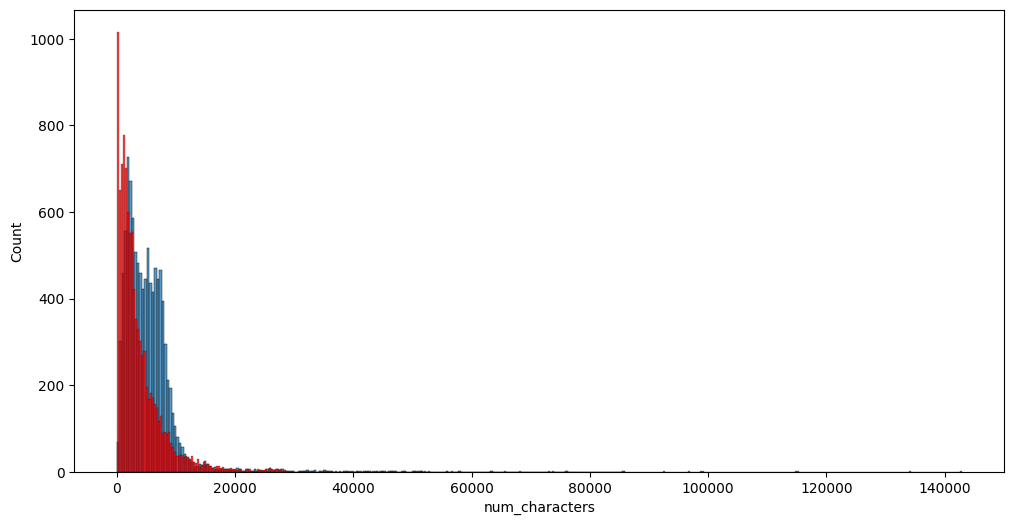

In [34]:
# characters

plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')
plt.show()

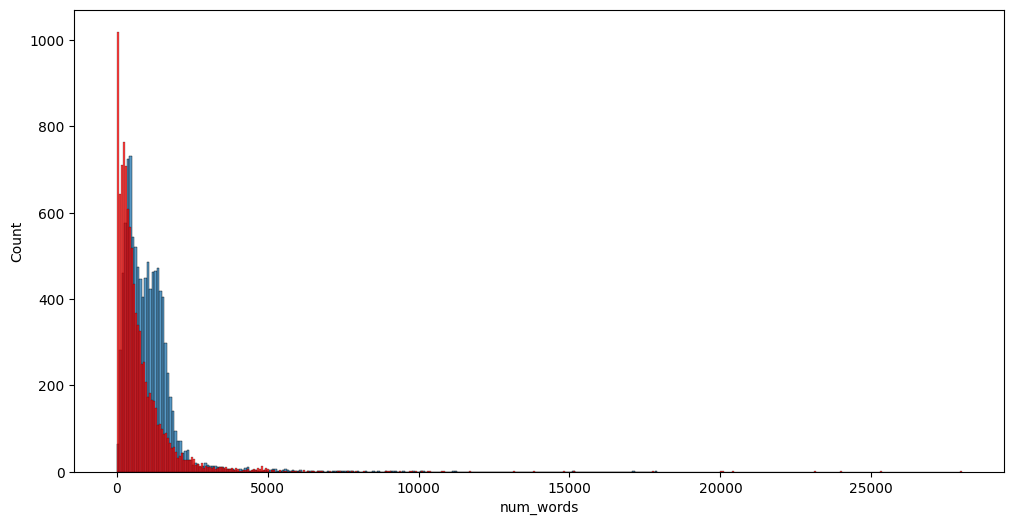

In [35]:
# words
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')
plt.show()

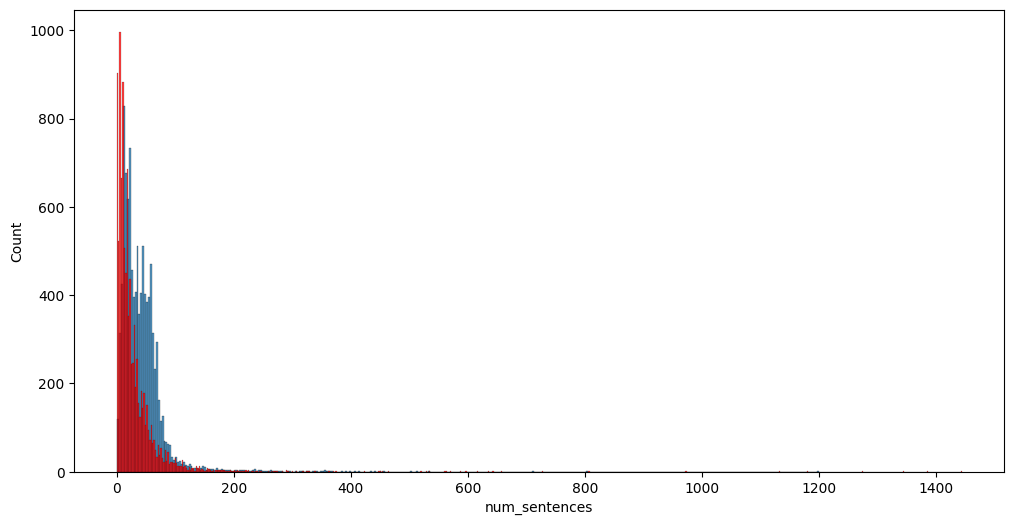

In [36]:
# sentences
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'])
sns.histplot(df[df['label'] == 1]['num_sentences'],color='red')
plt.show()

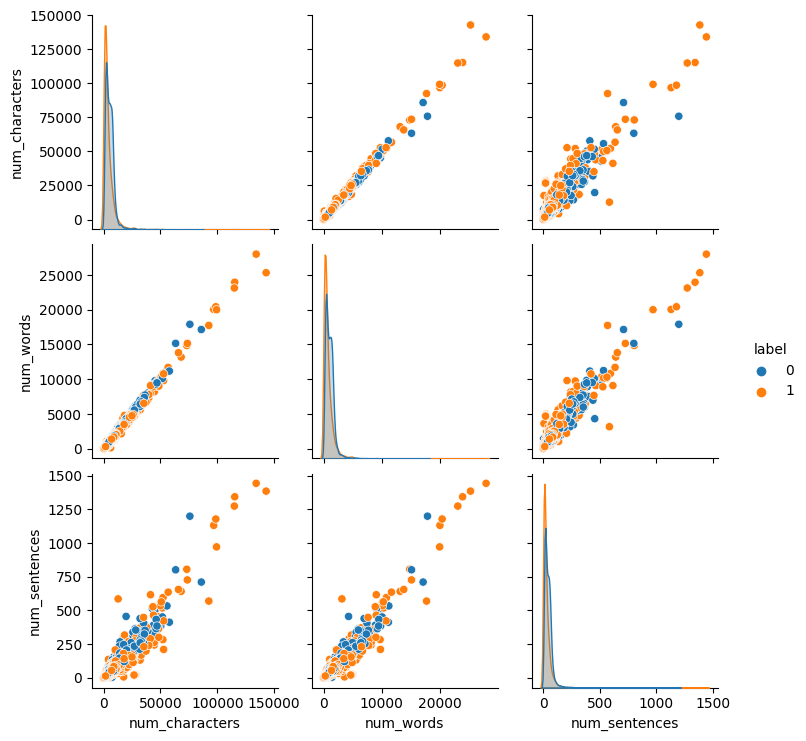

In [37]:
sns.pairplot(df,hue='label')
plt.show()

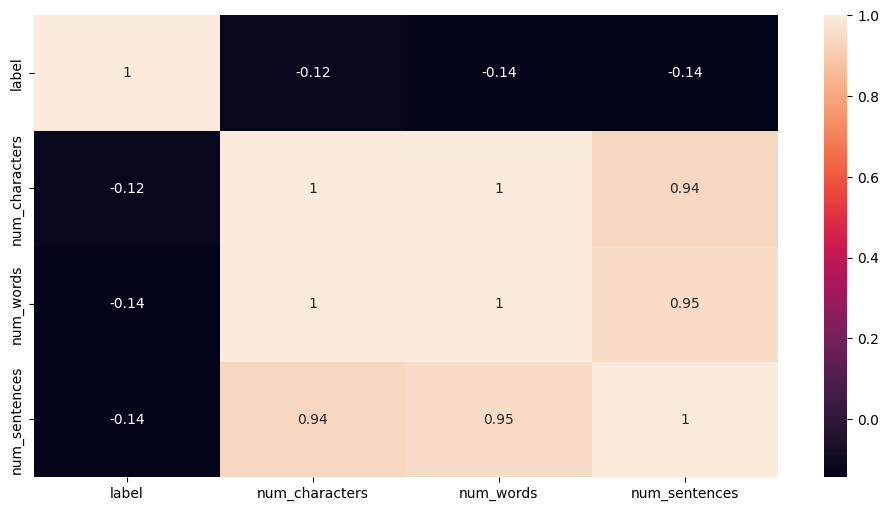

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data preprocessing

In [39]:
import nltk
import re
from nltk.corpus import stopwords
import string

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): #remove special charactes except alphanumeric
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #word stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
transform_text("We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey.")

'even see comey letter jason chaffetz tweet darrel lucu octob 30 2016 subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ licens apolog keith olbermann doubt worst person world director jame comey'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,text,label,num_characters,num_words,num_sentences,transformed_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,943,37,hous dem aid even see comey letter jason chaff...
1,Ever get the feeling your life circles the rou...,0,4160,822,29,ever get feel life circl roundabout rather hea...
2,"Why the Truth Might Get You Fired October 29, ...",1,7692,1454,51,truth might get fire octob 29 2016 tension int...
3,Videos 15 Civilians Killed In Single US Airstr...,1,3237,612,27,video 15 civilian kill singl us airstrik ident...
4,Print \nAn Iranian woman has been sentenced to...,1,938,177,5,print iranian woman sentenc six year prison ir...


In [46]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
fake_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

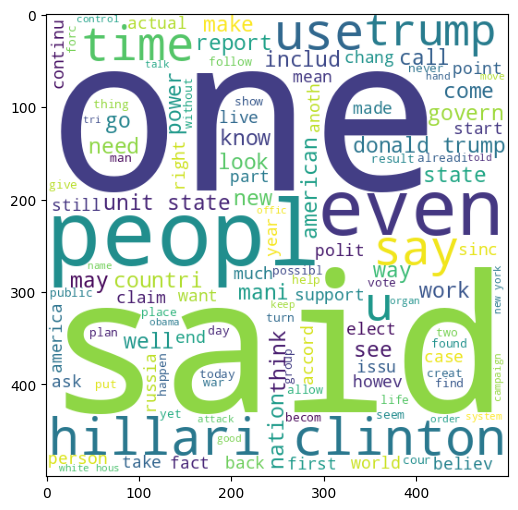

In [49]:
plt.figure(figsize=(18,6))
plt.imshow(fake_wc)
plt.show()

In [50]:
not_fake_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

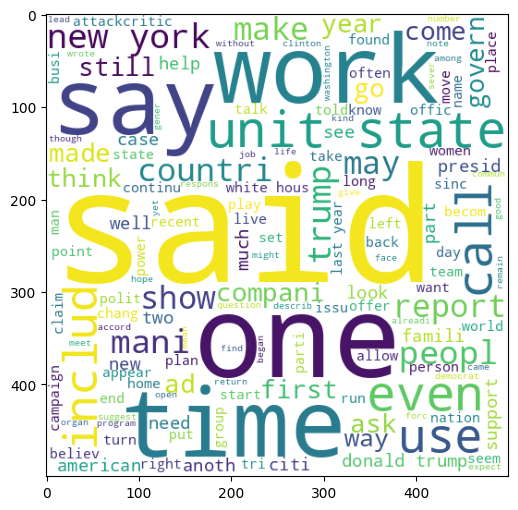

In [51]:
plt.figure(figsize=(18,6))
plt.imshow(not_fake_wc)
plt.show()

In [52]:
fake_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

In [53]:
len(fake_corpus)

3574481

In [54]:
from collections import Counter

In [55]:
Counter(fake_corpus).most_common(30)

[('trump', 19253),
 ('clinton', 19211),
 ('peopl', 16305),
 ('one', 15913),
 ('state', 15382),
 ('would', 14209),
 ('us', 13706),
 ('like', 12160),
 ('hillari', 12159),
 ('time', 11883),
 ('said', 11573),
 ('elect', 10582),
 ('year', 10122),
 ('new', 9915),
 ('also', 9712),
 ('american', 9634),
 ('go', 9240),
 ('use', 9211),
 ('even', 8936),
 ('presid', 8786),
 ('world', 8766),
 ('govern', 8640),
 ('say', 8421),
 ('get', 8412),
 ('make', 8349),
 ('war', 8063),
 ('mani', 7815),
 ('report', 7788),
 ('nation', 7559),
 ('could', 7356)]

In [56]:
d1 = pd.DataFrame(Counter(fake_corpus).most_common(30))[0]

In [57]:
d1.head()

0      trump
1    clinton
2      peopl
3        one
4      state
Name: 0, dtype: object

In [58]:
d2 = pd.DataFrame(Counter(fake_corpus).most_common(30))[1]

In [59]:
d2.head()

0    19253
1    19211
2    16305
3    15913
4    15382
Name: 1, dtype: int64

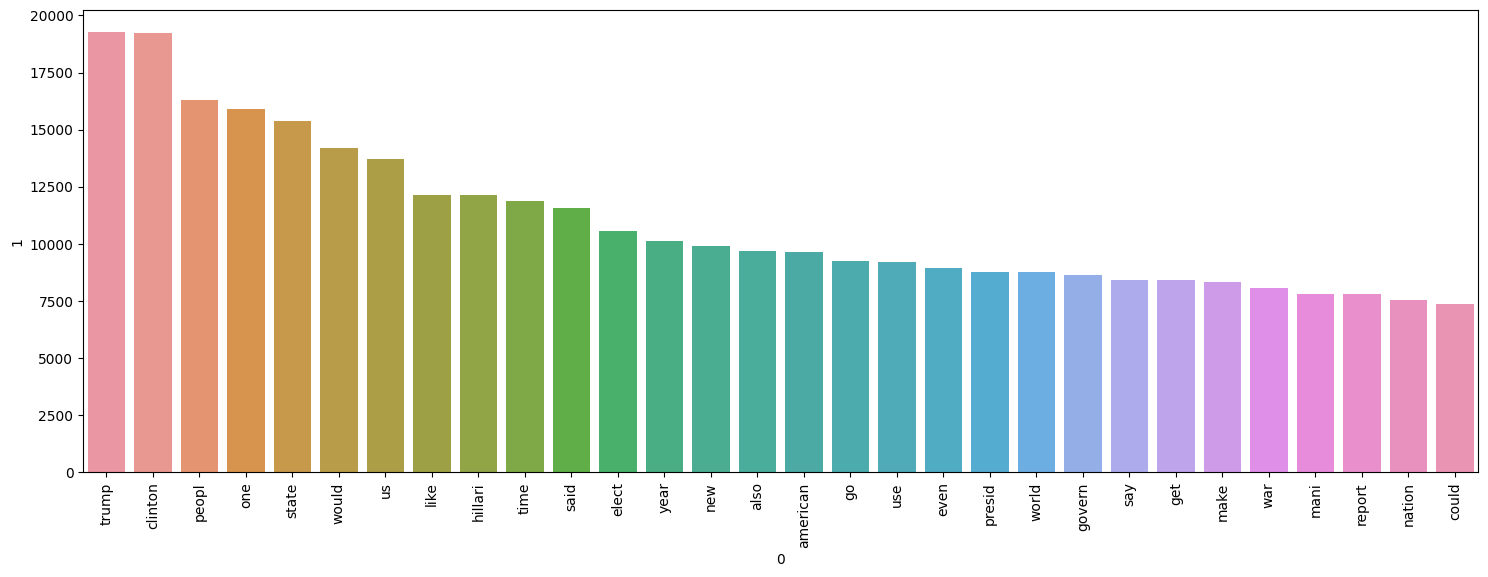

In [61]:
plt.figure(figsize = (18,6))
sns.barplot(x=d1,y=d2)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
not_fake_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_fake_corpus.append(word)

In [63]:
len(not_fake_corpus)

4967903

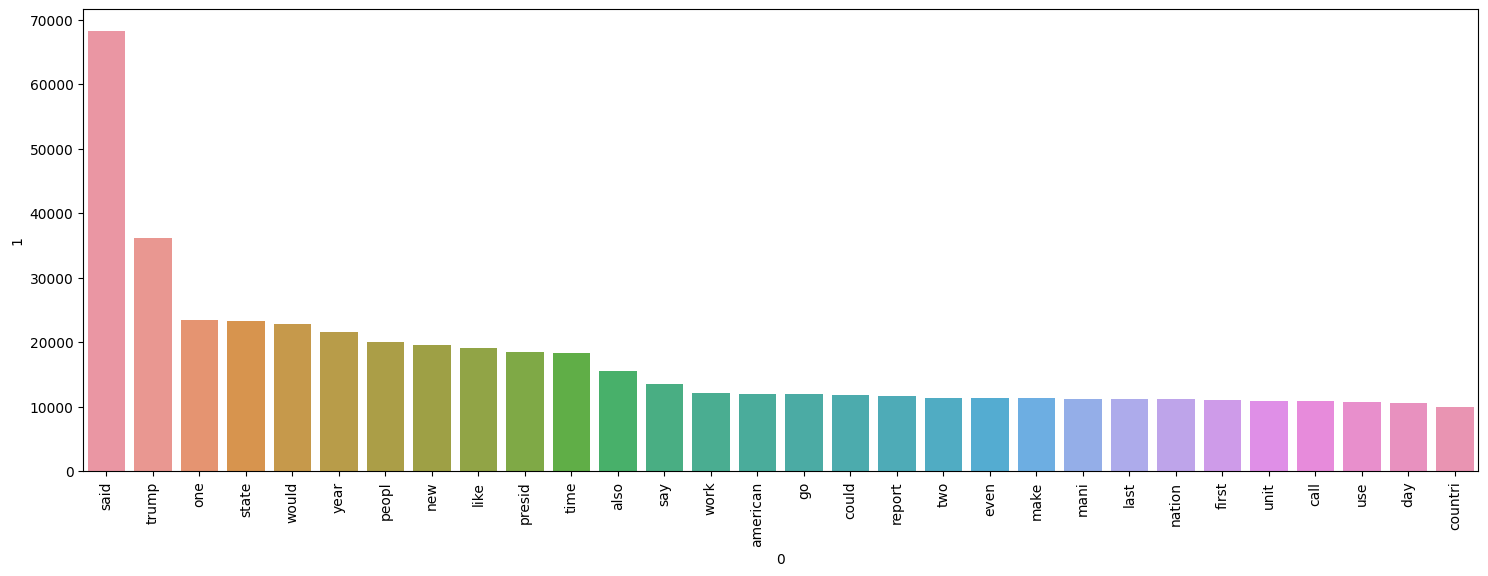

In [64]:
plt.figure(figsize = (18,6))
sns.barplot(x=pd.DataFrame(Counter(not_fake_corpus).most_common(30))[0],y=pd.DataFrame(Counter(not_fake_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## model building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=10000)

In [66]:
df.shape

(20386, 6)

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(20386, 10000)

In [69]:
y = df['label'].values

In [70]:
y

array([1, 0, 1, ..., 0, 1, 1])

In [71]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01573047, 0.01500068, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03476615, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8374203040706228
[[1919  150]
 [ 513 1496]]
0.9088699878493317


In [77]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.889651790093183
[[1937  132]
 [ 318 1691]]
0.927591881513988


In [78]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7356547327121138
[[1371  698]
 [ 380 1629]]
0.7000429737859906


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [86]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.8695438940657185, 0.8531802965088474)

In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9480137322216773
Precision -  0.9459057071960297
For  NB
Accuracy -  0.889651790093183
Precision -  0.927591881513988
For  DT
Accuracy -  0.8700343305541932
Precision -  0.8529832935560859
For  LR
Accuracy -  0.9391858754291319
Precision -  0.93140617344439
For  RF
Accuracy -  0.922756253065228
Precision -  0.9453207150368034
For  AdaBoost
Accuracy -  0.9234919077979402
Precision -  0.9108958837772397
For  GBDT
Accuracy -  0.9026483570377636
Precision -  0.8927875243664717
For  xgb
Accuracy -  0.9435998038254046
Precision -  0.939693524468611


In [88]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.948014,0.945906
4,RF,0.922756,0.945321
7,xgb,0.943600,0.939694
3,LR,0.939186,0.931406
1,NB,0.889652,0.927592
5,AdaBoost,0.923492,0.910896
6,GBDT,0.902648,0.892788
2,DT,0.870034,0.852983


In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))